# Adult Income

I want to explore the relationship that various aspects of a person has on their income. 

What factors are strong indicators of a person having an annual salary of over $50k?

In [823]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
import pydotplus

In [824]:
# load and read the data
df = pd.read_csv('Adult_Income.csv',)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [825]:
df.shape

(48842, 15)

In [826]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [827]:
df = df.rename(columns={'educational-num':'educational_num', 
                        'marital-status':'marital_status', 
                        'capital-gain':'capital_gain',
                        'capital-loss':'capital_loss', 
                        'hours-per-week':'hours_per_week', 
                        'native-country':'native_country'})
df

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Exploring Age and Income

In [828]:
print(df.age.unique())
print(df.age.nunique())

[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
74


In [829]:
df['age'].value_counts()

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

In [830]:
less50k = df[df['income'] == '<=50K']
over50k = df[df['income'] == '>50K']

In [831]:
print('less50k age mean: {}'.format(round(less50['age'].mean(), 2)))
print('less50k age std: {}'.format(round(less50['age'].std(), 2)))
print('over50k age mean: {}'.format(round(over50['age'].mean(), 2)))
print('over50k age std: {}'.format(round(over50['age'].std(), 2)))

less50k age mean: 36.87
less50k age std: 14.1
over50k age mean: 44.28
over50k age std: 10.56


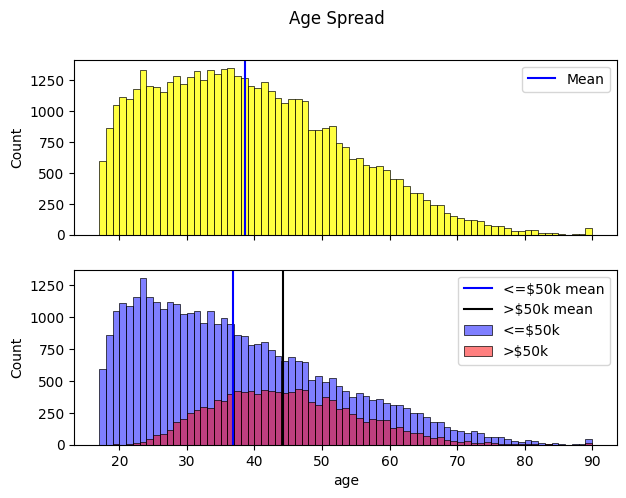

In [832]:
fig, ax = plt.subplots(2,1, figsize=(7, 5), sharex=True)
fig.suptitle('Age Spread')

g1 = sns.histplot(data=df, x='age', binwidth=1, color='yellow', ax=ax[0])
ax[0].axvline(x=df['age'].mean(), color='blue')
#g1.set(title="Age Spread")
ax[0].legend(['Mean'])

g2 = sns.histplot(data=less50k, x='age', binwidth=1, color='blue', alpha=0.5, ax=ax[1])
g2 = sns.histplot(data=over50k, x='age', binwidth=1, color='red', alpha=0.5, ax=ax[1])
ax[1].axvline(x=less50['age'].mean(), color='blue')
ax[1].axvline(x=over50['age'].mean(), color='black')
ax[1].legend(['<=$50k mean', '>$50k mean', '<=$50k', '>$50k'])

plt.subplots_adjust(wspace=0.3)
plt.show()

There is a clear cluster of people between 37 and 52 having salaries over $50k. This could be simple because as people spend more years in the working industry, their salary naturally keeps increasing as well as younger people having more entry level jobs.

## Exploring Workclass and Income

In [833]:
# these two function create a dataframe of each value of a given column and measure the percentage of
# people who fall under or over 50k income

def income_df(column):
    col = list(df[column].unique())
    lst = []
    for value in col:
        lst.append(df[df[column] == value]['income'].value_counts(normalize=True)\
                    .to_frame()['income'].to_frame().rename(columns={'income':value}))
    frame = pd.concat(lst, axis=1, ignore_index=False).reset_index().rename(columns={'index':'income'})
    lst = frame
    return frame

def income_df_and_list(column):
    frame = income_df(column)
    lst_cols = [x for x in frame.columns if x not in ['income']]
    return frame, lst_cols

In [834]:
# this function creates a grid of subplots

def barplots(columns, data, title, ncol=None, figsize=(10,10)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False, sharey=True)
    fig.suptitle(title)
    fig.subplots_adjust(wspace=0.5, hspace=0.5)

    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        sns.barplot(x = 'income', y = col, data=data, ax=ax)
        ax.set(xlabel=col, ylabel='(%)')
        ax.grid(visible=1, axis='y')
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.xaxis.label.set_size(10)
        ax.yaxis.label.set_size(10)
        
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)
    plt.tight_layout()
    plt.show()

In [835]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [836]:
workclass, workclass_values = income_df_and_list('workclass')
workclass

,income,Private,Local-gov,?,Self-emp-not-inc,Federal-gov,State-gov,Self-emp-inc,Without-pay,Never-worked
0,<=50K,0.782133,0.704401,0.905323,0.721129,0.60824,0.732458,0.446608,0.904762,1.0
1,>50K,0.217867,0.295599,0.094677,0.278871,0.39176,0.267542,0.553392,0.095238,NaN


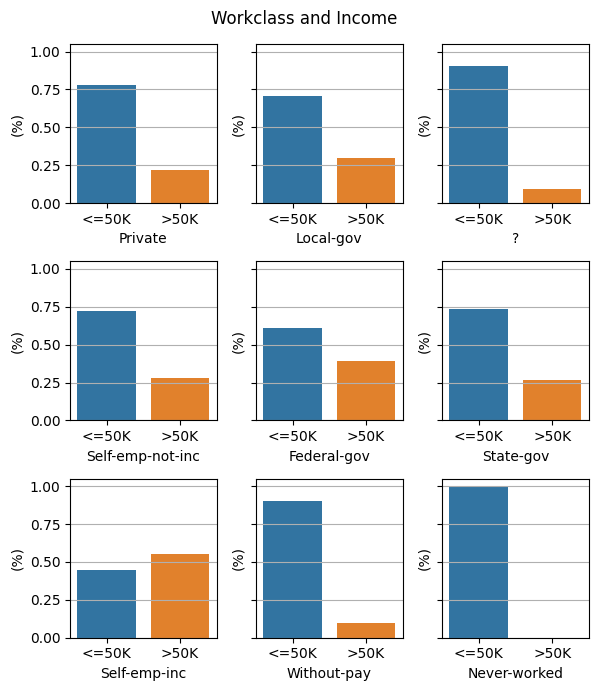

In [837]:
barplots(workclass_values, workclass, 'Workclass and Income', ncol=3, figsize=(6,7))

There is a significant higher percentange of pleople with salaries of $50k or more for people that work for the federal government and especially for those that are self employed.

## Exploring Education and Income

In [838]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [839]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [840]:
df['educational_num'].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational_num, dtype: int64

In [841]:
education, education_values = income_df_and_list('education')
education

,income,11th,HS-grad,Assoc-acdm,Some-college,10th,Prof-school,7th-8th,Bachelors,Masters,Doctorate,5th-6th,Assoc-voc,9th,12th,1st-4th,Preschool
0,<=50K,0.949227,0.841422,0.742036,0.810351,0.937365,0.260192,0.935079,0.587165,0.450884,0.274411,0.946955,0.746725,0.945767,0.926941,0.967611,0.987952
1,>50K,0.050773,0.158578,0.257964,0.189649,0.062635,0.739808,0.064921,0.412835,0.549116,0.725589,0.053045,0.253275,0.054233,0.073059,0.032389,0.012048


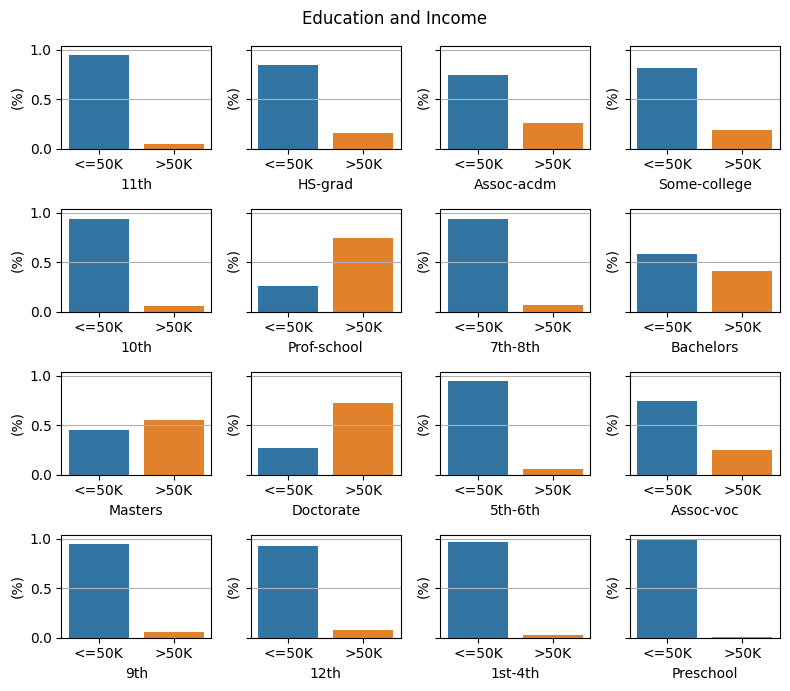

In [842]:
barplots(education_values, education, 'Education and Income', ncol=4, figsize=(8,7))

We can clearly see that people that have degrees in higher education are more likely to have salaries over $50k. These include people with bachelors, masters, docrotate degrees and those that attended professional school.

### Income of High School Graduates

In [843]:
# function to check discrepancy between two columns
def check_discrepancy(df, column1, column2):
    """This function checks if there are multiple unique values in column2 for each unique 
    value in column1 of the dataframe df.
    """
    
    lst = list(df[column1].unique())
    counter = 0
    for i in lst:
        if len(list(df[df[column1] == i][column2].unique())) >= 2:
            print('{}: {}      {}: {}'\
                  .format(column1, i,\
                          column2, list(df[df[column1] == i][column2].unique())))
        else:
            counter += 1
    if counter == len(lst):
        print('There are no discrepancies between {} and {}'\
             .format(column1, column2))

In [844]:
print(check_discrepancy(df, 'education', 'educational_num'))
print(check_discrepancy(df, 'educational_num', 'education'))

There are no discrepancies between education and educational_num
None
There are no discrepancies between educational_num and education
None


There is only one educational number for each value in education. We can see that any person with an education_num value of 9 or greater was a a high school graduate. We will split the data into two dataframes. One will contain all the high school graduates and the other will contain the ones that did not graduate hig school.

In [845]:
# add column hs indicating 1 if ther person graduated high school and 0 if they did not
df.loc[df['educational_num'] >= 9, 'hs'] = 'yes_grad'
df.loc[df['educational_num'] < 9, 'hs'] = 'no_grad'

In [846]:
hs, hs_values = income_df_and_list('hs')
hs

,income,no_grad,yes_grad
0,<=50K,0.942884,0.733209
1,>50K,0.057116,0.266791


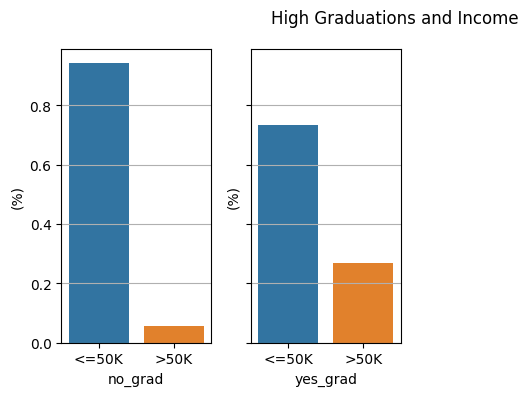

In [847]:
barplots(hs_values, hs, 'High Graduations and Income', ncol=4, figsize=(8,4))

This reenforces that the more education an person has, the higher the chance of them having a salary over $50k.

## Exploring Gender and Income

In [848]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [849]:
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [850]:
gender, gender_values = income_df_and_list('gender')
gender

,income,Male,Female
0,<=50K,0.696233,0.890749
1,>50K,0.303767,0.109251


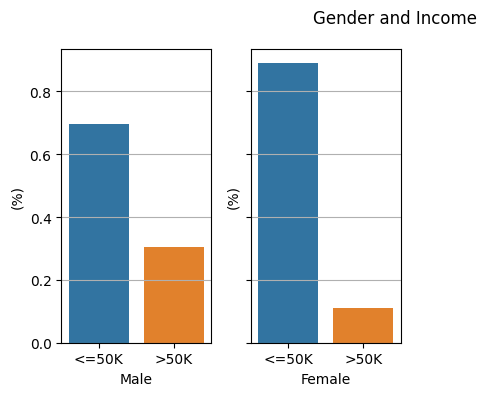

In [851]:
barplots(gender_values, gender, 'Gender and Income', ncol=4, figsize=(8,4))

We can see there is a significant difference in the number of men with salaries over $50k comapared to women.

## Exploring Income and Marital Status

In [852]:
df['marital_status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [853]:
df['marital_status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital_status, dtype: int64

In [854]:
marital_status, marital_status_values = income_df_and_list('marital_status')
marital_status

,income,Never-married,Married-civ-spouse,Widowed,Divorced,Separated,Married-spouse-absent,Married-AF-spouse
0,<=50K,0.95452,0.553867,0.915679,0.898839,0.935294,0.907643,0.621622
1,>50K,0.04548,0.446133,0.084321,0.101161,0.064706,0.092357,0.378378


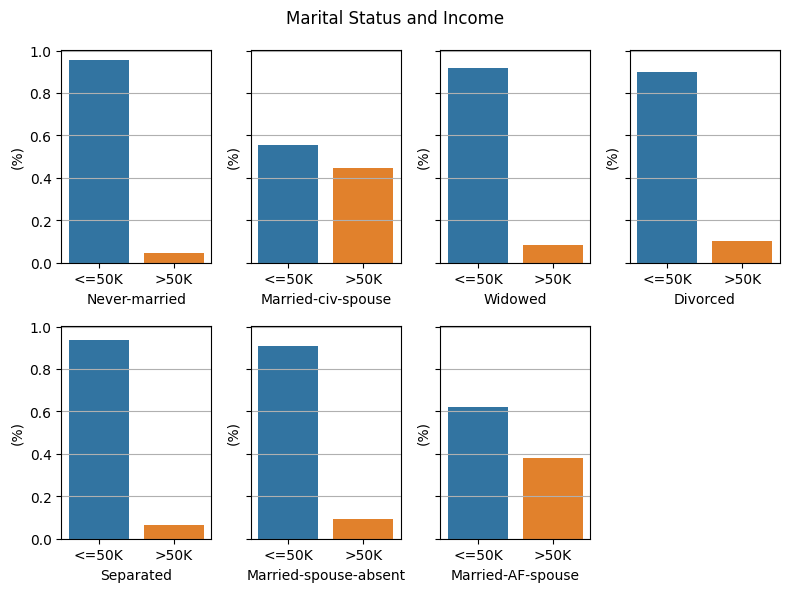

In [855]:
barplots(marital_status_values, marital_status, 'Marital Status and Income', ncol=4, figsize=(8,6))

There is a significant higher percentage of people with salaries over $50k if a person is married.

## Exploring Income and Occupation

In [856]:
print(df['occupation'].unique())
print(df['occupation'].nunique())

['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
15


In [857]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [858]:
occupation, occupation_values = income_df_and_list('occupation')
occupation

,income,Machine-op-inspct,Farming-fishing,Protective-serv,?,Other-service,Prof-specialty,Craft-repair,Adm-clerical,Exec-managerial,Tech-support,Sales,Priv-house-serv,Transport-moving,Handlers-cleaners,Armed-Forces
0,<=50K,0.876903,0.883893,0.686673,0.90566,0.958562,0.548931,0.773724,0.863126,0.522182,0.709544,0.732013,0.987603,0.795754,0.933398,0.666667
1,>50K,0.123097,0.116107,0.313327,0.09434,0.041438,0.451069,0.226276,0.136874,0.477818,0.290456,0.267987,0.012397,0.204246,0.066602,0.333333


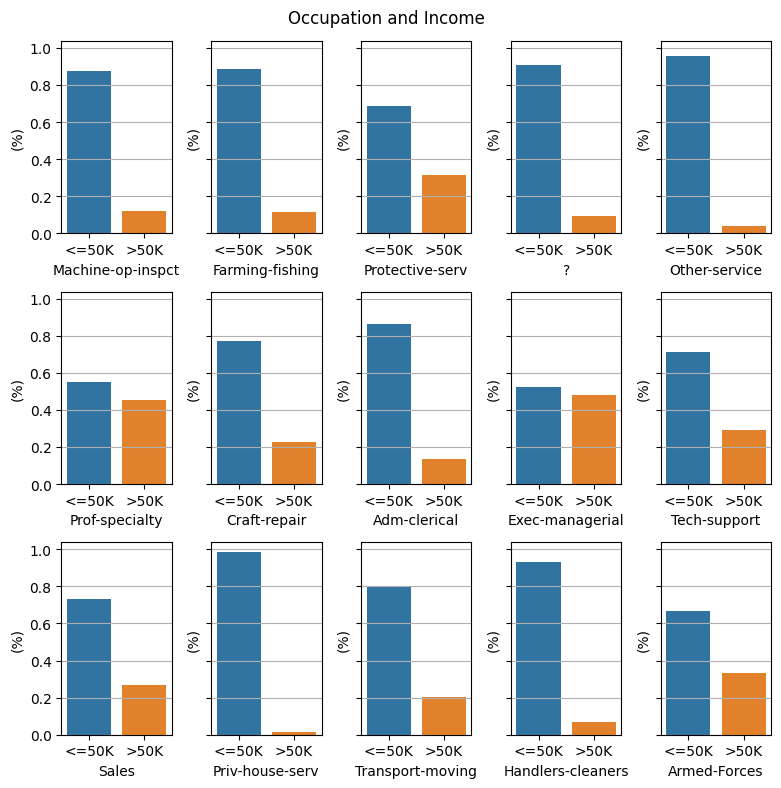

In [859]:
barplots(occupation_values, occupation, 'Occupation and Income', ncol=5, figsize=(8,8))

There are a few occupations that have a much higher percentage of people with salaries over $50k. These include professional specialty, managerial executive, tech support and armed forces.

## Exploring Relationship and Income

In [860]:
df['relationship'].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [861]:
df['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [862]:
relationship, relationship_values = income_df_and_list('relationship')
relationship

,income,Own-child,Husband,Not-in-family,Unmarried,Wife,Other-relative
0,<=50K,0.985358,0.551329,0.898593,0.939707,0.531103,0.965471
1,>50K,0.014642,0.448671,0.101407,0.060293,0.468897,0.034529


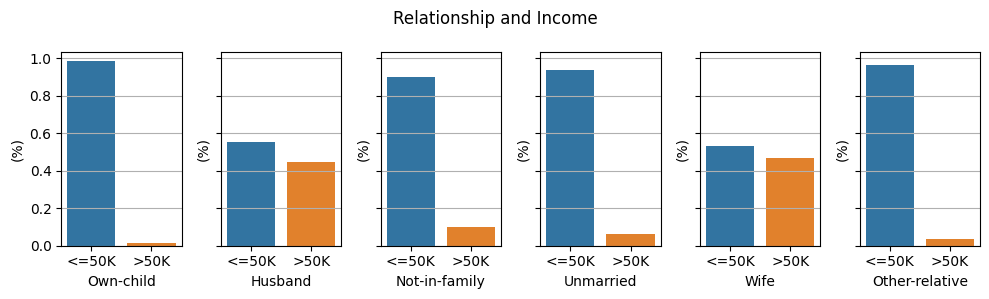

In [863]:
barplots(relationship_values, relationship, 'Relationship and Income', ncol=6, figsize=(10,3))

Husband and wife are the two categories that have noticeable higher percentage of people with $50K+ salaries. This reenforces the marital status we saw earlier.

## Exploring Income and Race

In [864]:
df['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [865]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [866]:
race, race_values = income_df_and_list('race')
race

,income,Black,White,Asian-Pac-Islander,Other,Amer-Indian-Eskimo
0,<=50K,0.879189,0.746013,0.730744,0.876847,0.882979
1,>50K,0.120811,0.253987,0.269256,0.123153,0.117021


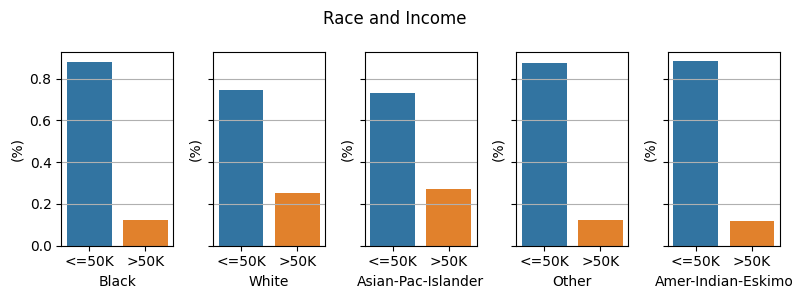

In [867]:
barplots(race_values, race, 'Race and Income', ncol=5, figsize=(8,3))

It is clear that white and asian pacific islander people have higher percentages of people who earn over $50k.

## Exploring Capital Gain and Income

In [869]:
df['capital_gain'].unique()

array([    0,  7688,  3103,  6418,  7298,  3908, 14084,  5178, 15024,
       99999,  2597,  2907,  4650,  6497,  1055,  5013, 27828,  4934,
        4064,  3674,  2174, 10605,  3418,   114,  2580,  3411,  4508,
        4386,  8614, 13550,  6849,  2463,  3137,  2885,  2964,  1471,
       10566,  2354,  1424,  1455,  3325,  4416, 25236,   594,  2105,
        4787,  2829,   401,  4865,  1264,  1506, 10520,  3464,  2653,
       20051,  4101,  1797,  2407,  3471,  1086,  1848, 14344,  1151,
        2993,  2290, 15020,  9386,  2202,  3818,  2176,  5455, 11678,
        7978,  7262,  6514, 41310,  3456,  7430,  2414,  2062, 34095,
        1831,  6723,  5060, 15831,  2977,  2346,  3273,  2329,  9562,
        2635,  4931,  1731,  6097,   914,  7896,  5556,  1409,  3781,
        3942,  2538,  3887, 25124,  7443,  5721,  1173,  4687,  6612,
        6767,  2961,   991,  2036,  2936,  2050,  1111,  2228, 22040,
        3432,  6360,  2009,  1639, 18481,  2387])

In [870]:
df['capital_gain'].value_counts()

0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
2387         1
22040        1
6612         1
1111         1
1639         1
Name: capital_gain, Length: 123, dtype: int64

In [871]:
gain = df[df['capital_gain'] != 0]

In [872]:
less50k_gain = gain[gain['income'] == '<=50K']
over50k_gain = gain[gain['income'] == '>50K']

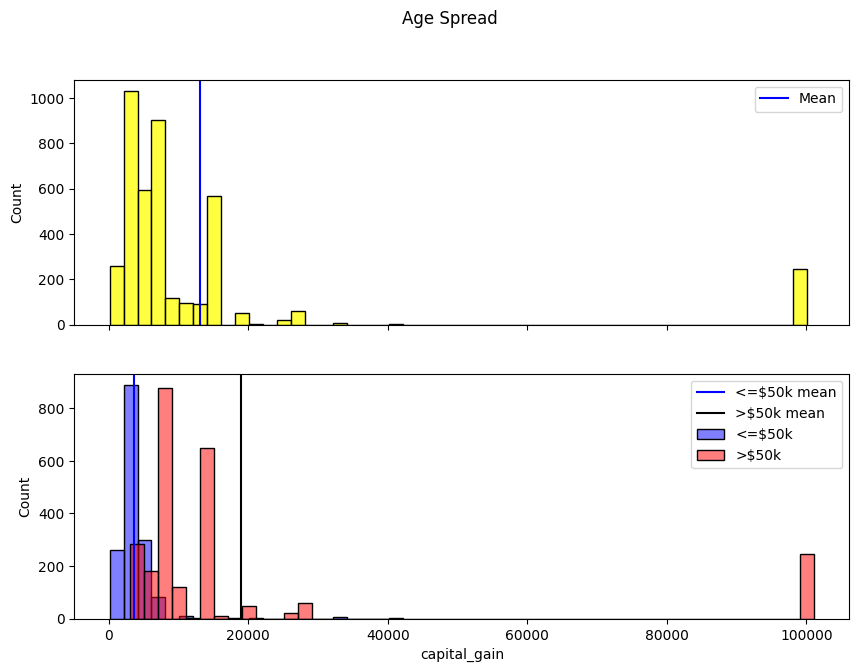

In [873]:
fig, ax = plt.subplots(2,1, figsize=(10, 7), sharex=True)
fig.suptitle('Age Spread')

g1 = sns.histplot(data=gain, x='capital_gain', binwidth=2000, color='yellow', ax=ax[0])
ax[0].axvline(x=gain['capital_gain'].mean(), color='blue')
#g1.set(title="Age Spread")
ax[0].legend(['Mean'])

g2 = sns.histplot(data=less50k_gain, x='capital_gain', binwidth=2000, color='blue', alpha=0.5, ax=ax[1])
g2 = sns.histplot(data=over50k_gain, x='capital_gain', binwidth=2000, color='red', alpha=0.5, ax=ax[1])
ax[1].axvline(x=less50k_gain['capital_gain'].mean(), color='blue')
ax[1].axvline(x=over50k_gain['capital_gain'].mean(), color='black')
ax[1].legend(['<=$50k mean', '>$50k mean', '<=$50k', '>$50k'])

plt.subplots_adjust(wspace=0.3)
plt.show()

There does seem to be a trend of people with higher capital gains who earn more than $50k annually.

## Exploring Capital Loss and Income

In [874]:
df['capital_loss'].unique()

array([   0, 1721, 1876, 2415, 1887,  625, 1977, 2057, 1429, 1590, 1485,
       2051, 2377, 1672, 1628, 1902, 1602, 1741, 2444, 1408, 2001, 2042,
       1740, 1825, 1848, 1719, 3004, 2179, 1573, 2205, 1258, 2339, 1726,
       2258, 1340, 1504, 2559, 1668, 1974, 1980, 1564, 2547, 2002, 1669,
       1617,  323, 3175, 2472, 2174, 1579, 2129, 1510, 1735, 2282, 1870,
       1411, 1911, 1651, 1092, 1762, 2457, 2231, 2238,  653, 1138, 2246,
       2603, 2392, 1944, 1380, 2465, 1421, 3770, 1594,  213, 2149, 2824,
       1844, 2467, 2163, 1816, 1648, 2206, 2352,  419, 1539,  880,  810,
        974, 4356, 2489, 1755, 3683, 2267, 2080,  155, 3900, 2201, 2754])

In [875]:
df['capital_loss'].value_counts()

0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
2489        1
2201        1
1421        1
1870        1
Name: capital_loss, Length: 99, dtype: int64

In [876]:
loss = df[df['capital_loss'] != 0]

In [877]:
less50k_loss = loss[loss['income'] == '<=50K']
over50k_loss = loss[loss['income'] == '>50K']

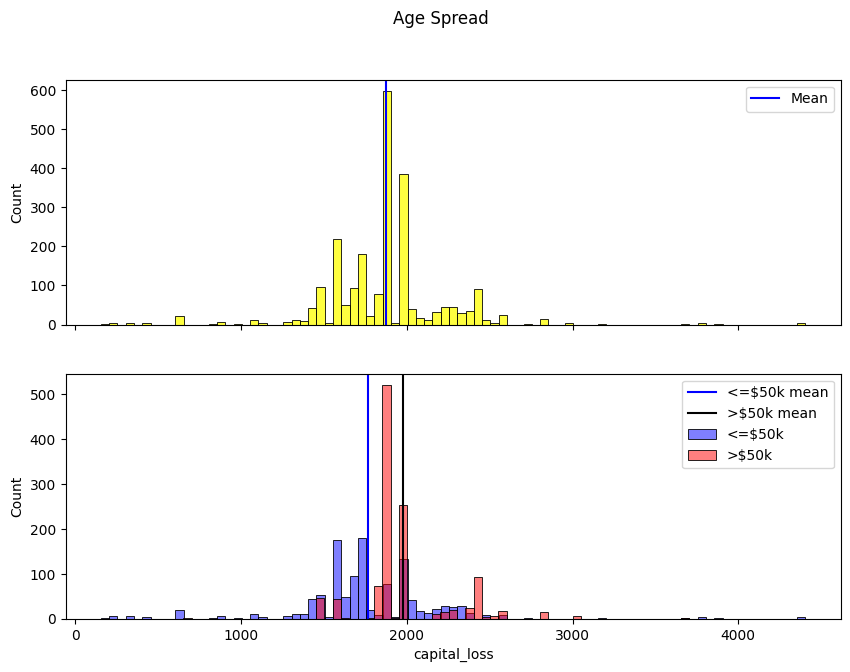

In [887]:
fig, ax = plt.subplots(2,1, figsize=(10, 7), sharex=True)
fig.suptitle('Age Spread')

g1 = sns.histplot(data=loss, x='capital_loss', binwidth=50, color='yellow', ax=ax[0])
ax[0].axvline(x=loss['capital_loss'].mean(), color='blue')
#g1.set(title="Age Spread")
ax[0].legend(['Mean'])

g2 = sns.histplot(data=less50k_loss, x='capital_loss', binwidth=50, color='blue', alpha=0.5, ax=ax[1])
g2 = sns.histplot(data=over50k_loss, x='capital_loss', binwidth=50, color='red', alpha=0.5, ax=ax[1])
ax[1].axvline(x=less50k_loss['capital_loss'].mean(), color='blue')
ax[1].axvline(x=over50k_loss['capital_loss'].mean(), color='black')
ax[1].legend(['<=$50k mean', '>$50k mean', '<=$50k', '>$50k'])

plt.subplots_adjust(wspace=0.3)
plt.show()

There appears to be a very weak trend of people who earn over $50k that have higher capital losses.

### Exploring Hours per Week and Income

In [879]:
df['hours_per_week'].unique()

array([40, 50, 30, 32, 10, 39, 35, 48, 25, 20, 45, 47,  6, 43, 90, 54, 60,
       38, 36, 18, 24, 44, 56, 28, 16, 41, 22, 55, 14, 33, 37,  8, 12, 70,
       15, 75, 52, 84, 42, 80, 68, 99, 65,  5, 17, 72, 53, 29, 96, 21, 46,
        3,  1, 23, 49, 67, 76,  7,  2, 58, 26, 34,  4, 51, 78, 63, 31, 92,
       77, 27, 85, 13, 19, 98, 62, 66, 57, 11, 86, 59,  9, 64, 73, 61, 88,
       79, 89, 74, 69, 87, 97, 94, 82, 91, 81, 95])

In [880]:
df['hours_per_week'].value_counts()

40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
69        1
94        1
79        1
82        1
87        1
Name: hours_per_week, Length: 96, dtype: int64

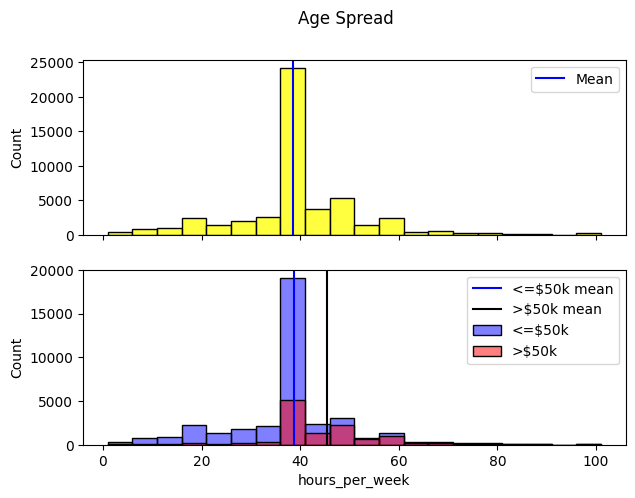

In [881]:
fig, ax = plt.subplots(2,1, figsize=(7, 5), sharex=True)
fig.suptitle('Age Spread')

g1 = sns.histplot(data=df, x='hours_per_week', binwidth=5, color='yellow', ax=ax[0])
ax[0].axvline(x=df['age'].mean(), color='blue')
#g1.set(title="Age Spread")
ax[0].legend(['Mean'])

g2 = sns.histplot(data=less50k, x='hours_per_week', binwidth=5, color='blue', alpha=0.5, ax=ax[1])
g2 = sns.histplot(data=over50k, x='hours_per_week', binwidth=5, color='red', alpha=0.5, ax=ax[1])
ax[1].axvline(x=less50['hours_per_week'].mean(), color='blue')
ax[1].axvline(x=over50['hours_per_week'].mean(), color='black')
ax[1].legend(['<=$50k mean', '>$50k mean', '<=$50k', '>$50k'])

plt.subplots_adjust(wspace=0.3)
plt.show()

There does not seem to be any trend here.

## Native Country and Income

In [882]:
df['native_country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [883]:
df['native_country'].nunique()

42

In [884]:
df['native_country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [885]:
native_country, native_country_values = income_df_and_list('native_country')
native_country

,income,United-States,?,Peru,Guatemala,Mexico,Dominican-Republic,Ireland,Germany,Philippines,...,Jamaica,Ecuador,Yugoslavia,Hungary,Hong,Greece,Trinadad&Tobago,Outlying-US(Guam-USVI-etc),France,Holand-Netherlands
0,<=50K,0.756023,0.743291,0.913043,0.965909,0.950578,0.951456,0.702703,0.718447,0.711864,...,0.858491,0.866667,0.652174,0.684211,0.733333,0.632653,0.925926,0.956522,0.578947,1.0
1,>50K,0.243977,0.256709,0.086957,0.034091,0.049422,0.048544,0.297297,0.281553,0.288136,...,0.141509,0.133333,0.347826,0.315789,0.266667,0.367347,0.074074,0.043478,0.421053,NaN


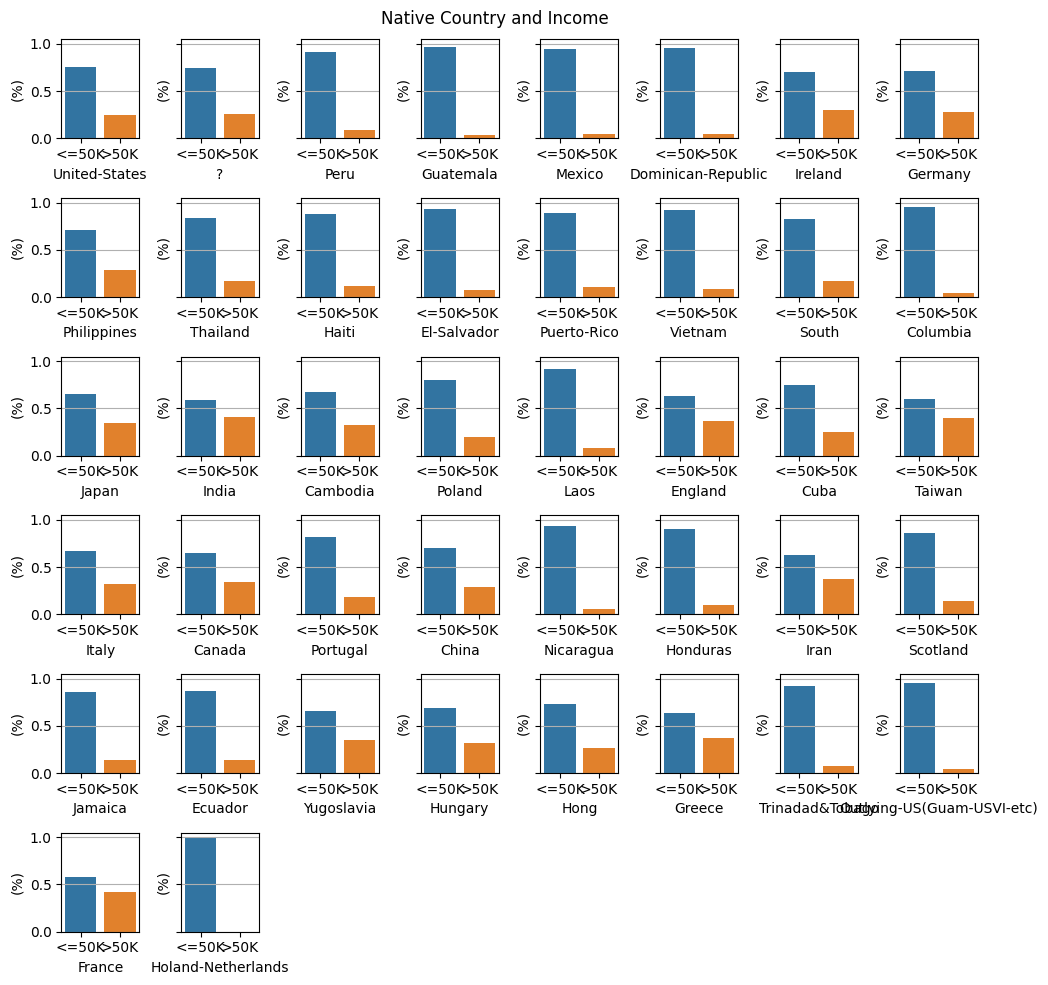

In [886]:
barplots(native_country_values, native_country, 'Native Country and Income', ncol=8, figsize=(10,10))

There seems to be a week indication that people from countries in Europe and in Asia have higher percentages of people earning over $50k a year.

In [889]:
df.head()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income,hs
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,no_grad
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,yes_grad
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,yes_grad
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,yes_grad
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,yes_grad


## Conclusion

From the exploration we have done, we can say that a person is very likely to have an annual salary of over $50k if they are a white or pacific islander married male between the age of 37 and 52, work for the federal government or are self employed, have degrees in higher education, are company executive or hold a professional specialty whose country of origin is in Europe or Asia.